In [2]:
from typing import TypedDict, Literal


class PortFolioState(TypedDict):
    amount_usd:float
    total_usd: float # usd * total interest it gets
    target_currency: Literal["INR", "EUR"]
    total:float # usd* current target rate

In [23]:
def calc_total_usd(state: PortFolioState)->PortFolioState:
    state['total_usd'] = state['amount_usd']*1.08  # 8% interest per annum

    return state

def convert_inr(state: PortFolioState)->PortFolioState:
    state['total'] = state['total_usd']*80  # 1USD = 80rs

    return state

def convert_eur(state: PortFolioState)->PortFolioState:
    state['total'] = state['total_usd']*0.86  # 1 USD = 0.85 EUR

    return state

def conversion_currency(state: PortFolioState) -> str:
    return state['target_currency']

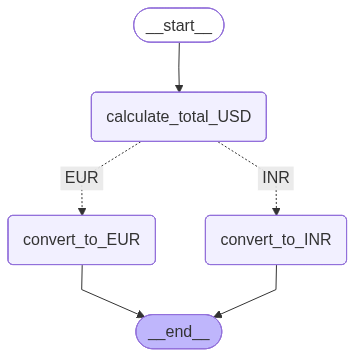

In [24]:
from langgraph.graph import StateGraph, START, END


builder = StateGraph(PortFolioState)

builder.add_node("calculate_total_USD", calc_total_usd)
builder.add_node("convert_to_INR", convert_inr)
builder.add_node('convert_to_EUR', convert_eur)


# Edge
builder.add_edge(START, "calculate_total_USD")

builder.add_conditional_edges("calculate_total_USD", 
                              conversion_currency,
                              {
                                  'INR':"convert_to_INR",
                                  "EUR": "convert_to_EUR"
                              }
                              )




builder.add_edge(["convert_to_INR", "convert_to_EUR"], END)



# compile the graph
builder.compile()

In [25]:
graph=builder.compile()

graph.invoke({
    "amount_usd": 1000,
    "target_currency": "INR"
})

{'amount_usd': 1000,
 'total_usd': 1080.0,
 'target_currency': 'INR',
 'total': 86400.0}

In [26]:
graph.invoke({
    "amount_usd": 1000,
    "target_currency": "EUR"
})

{'amount_usd': 1000,
 'total_usd': 1080.0,
 'target_currency': 'EUR',
 'total': 928.8}